# ***Handwritten Digit Recognition***

***Import Dependencies***

In [ ]:
# Importing required libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix , roc_curve , auc
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout , Activation, Flatten , Conv2D, MaxPooling2D
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import backend as K
import warnings
warnings.filterwarnings('ignore')

***Loading Dataset***

In [ ]:
# Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


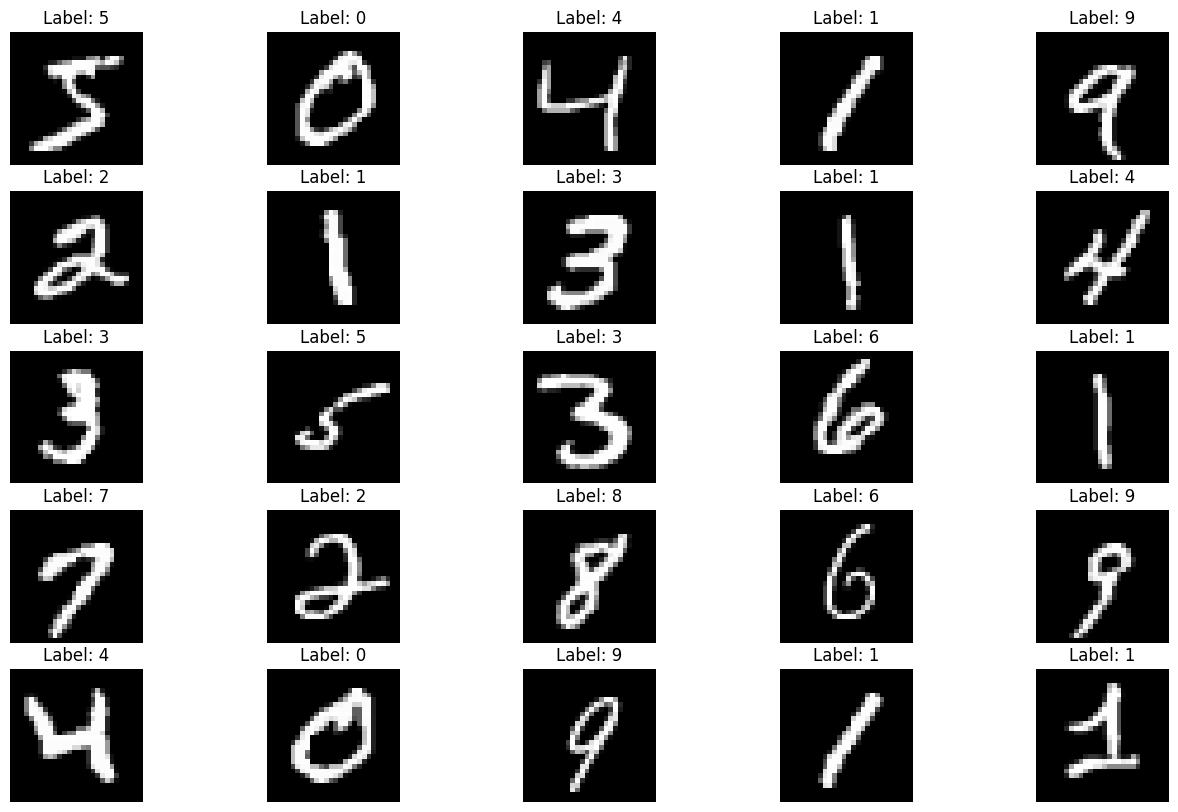

In [ ]:
plt.figure(figsize=(16, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

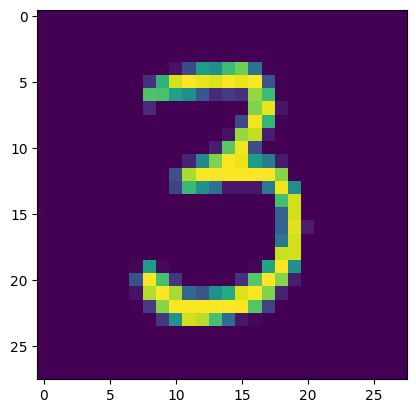

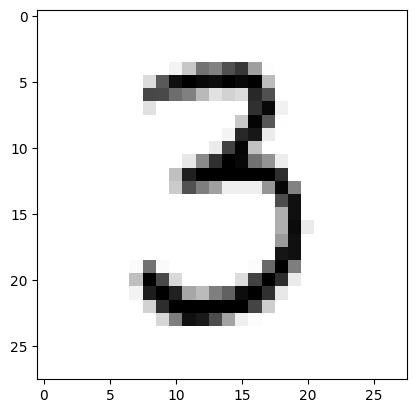

In [ ]:
plt.imshow(x_train[50])
plt.show()
plt.imshow(x_train[50] , cmap = plt.cm.binary)

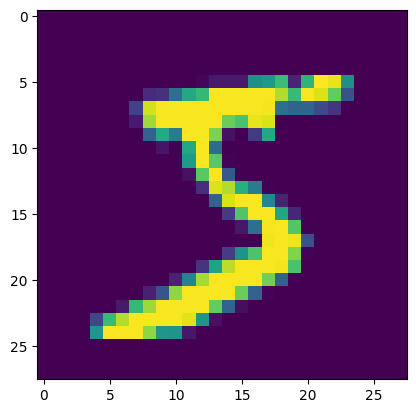

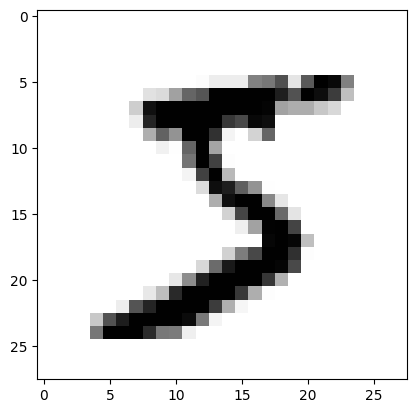

In [ ]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0] , cmap = plt.cm.binary)

***Data Preprocessing***

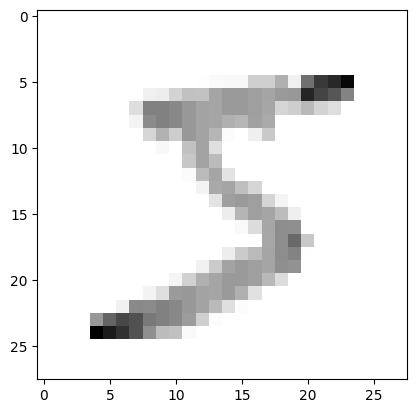

In [ ]:
x_train = tf.keras.utils.normalize(x_train , axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis = 1)
plt.imshow(x_train[0] , cmap = plt.cm.binary)

In [ ]:
# Reshape
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

print('Training shape' , x_train.shape)
print('\nTesting shape' , x_test.shape)

Training shape (60000, 28, 28, 1)

Testing shape (10000, 28, 28, 1)


In [ ]:
# One-hot encode the target variables
y_train = to_categorical(y_train , 10)
y_test = to_categorical(y_test  , 10)

***Model Building***

In [ ]:
input_shape = (28, 28, 1)
md_batch_size = 128
num_classes = 10
epochs_size = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3) , activation='relu' , input_shape=input_shape))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1600)             

In [ ]:
# compile model that we have created for handwritten digit recognition project

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

***Model Training***

In [ ]:
# Training the model

model_history = model.fit(x_train , y_train , batch_size=md_batch_size , verbose=1, epochs=epochs_size , validation_data=(x_test, y_test))

print("\nThe model has successfully trained")

model.save('mnist.h5')

print("\nSaving the model as mnist.h5")

Epoch 1/10
469/469 [==============================] - 53s 111ms/step - loss: 0.3070 - accuracy: 0.9061 - val_loss: 0.0737 - val_accuracy: 0.9764
Epoch 2/10
469/469 [==============================] - 48s 103ms/step - loss: 0.0977 - accuracy: 0.9704 - val_loss: 0.0463 - val_accuracy: 0.9854
Epoch 3/10
469/469 [==============================] - 52s 111ms/step - loss: 0.0721 - accuracy: 0.9779 - val_loss: 0.0402 - val_accuracy: 0.9867
Epoch 4/10
469/469 [==============================] - 49s 104ms/step - loss: 0.0584 - accuracy: 0.9819 - val_loss: 0.0362 - val_accuracy: 0.9891
Epoch 5/10
469/469 [==============================] - 50s 107ms/step - loss: 0.0507 - accuracy: 0.9847 - val_loss: 0.0330 - val_accuracy: 0.9894
Epoch 6/10
469/469 [==============================] - 49s 104ms/step - loss: 0.0423 - accuracy: 0.9864 - val_loss: 0.0271 - val_accuracy: 0.9909
Epoch 7/10
469/469 [==============================] - 50s 107ms/step - loss: 0.0392 - accuracy: 0.9879 - val_loss: 0.0261 - val_ac

***Model Evaluation***

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('\nTest accuracy:', score[1])

Test loss: 0.025407271459698677

Test accuracy: 0.9915000200271606


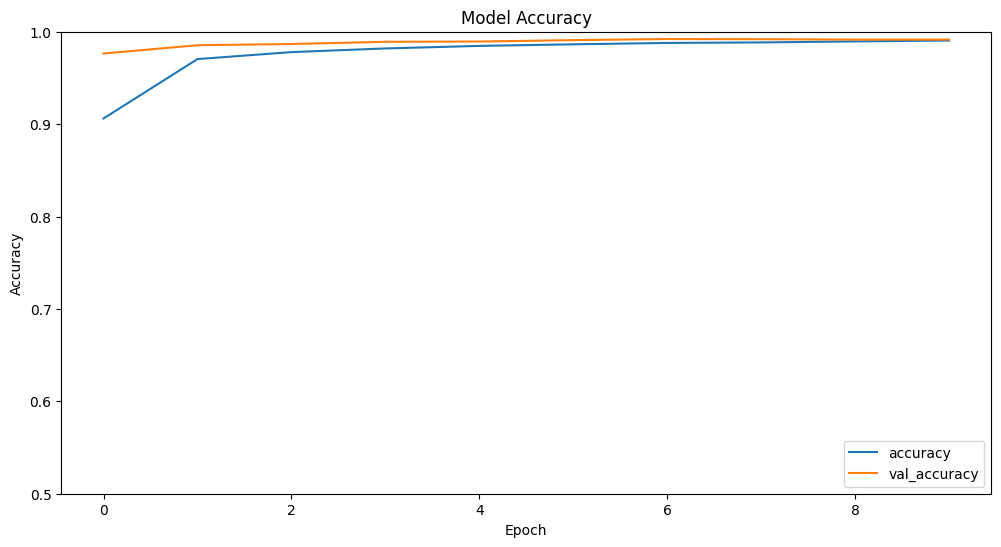

In [ ]:
# Plotting accuracy and loss curves

plt.figure(figsize=(12, 6))
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

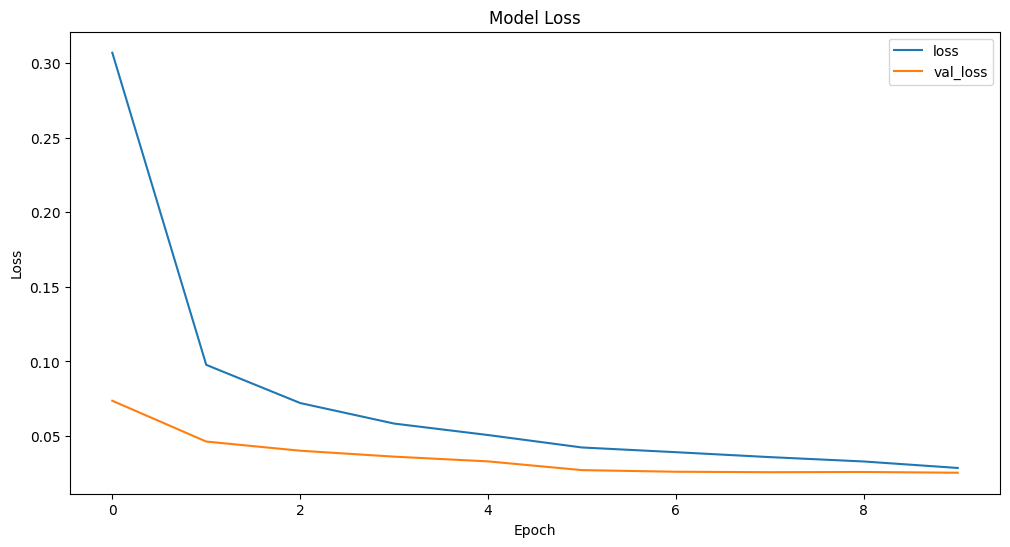

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Predicting the classes for test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


313/313 [==============================] - 4s 13ms/step


In [ ]:
print('Classification Report:')
print(classification_report(y_true, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



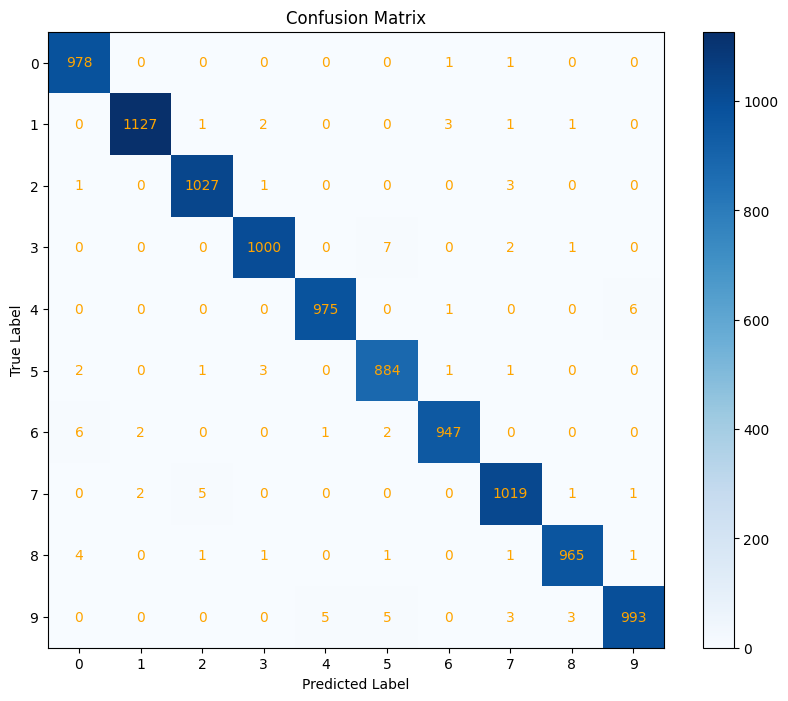

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
for i in range(10):
    for j in range(10):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='orange')
plt.show()


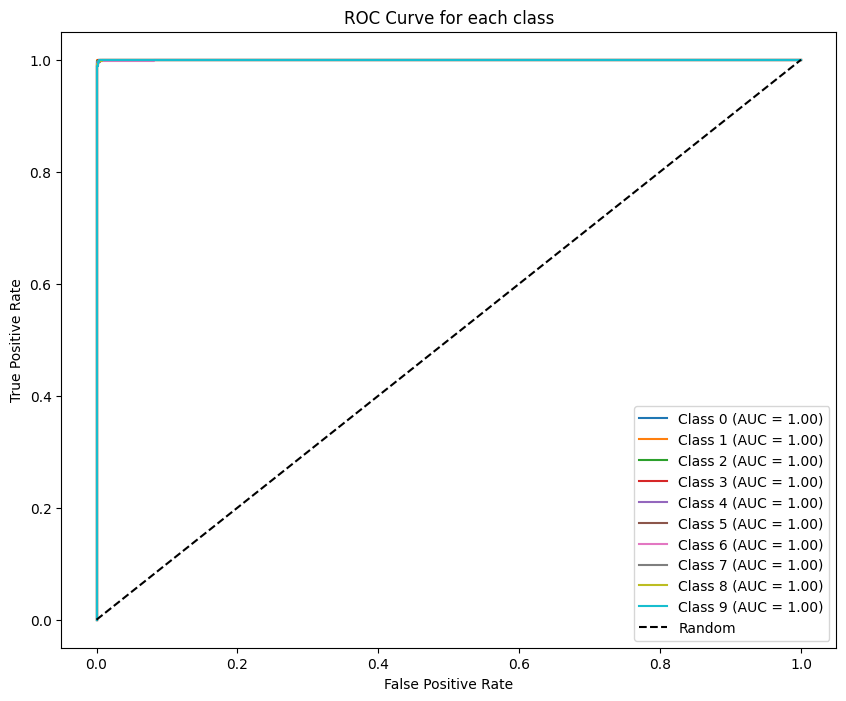

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc="lower right")
plt.show()

***Prediction Model :***

313/313 [==============================] - 5s 15ms/step


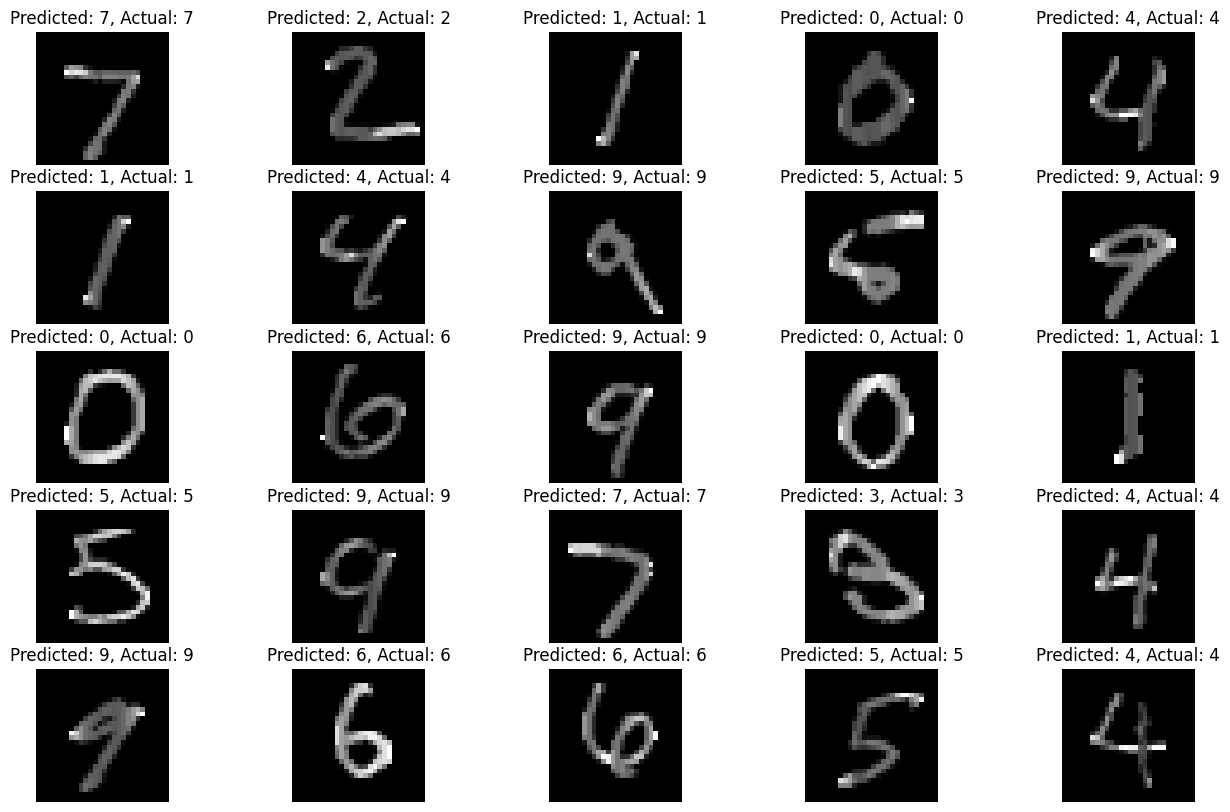

In [ ]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Find the index of the class with the highest probability for each prediction
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(16, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(predicted_labels[i], np.argmax(y_test[i])))
    plt.axis('off')
plt.show()

***Prediction Model for particular Random Digits***

1/1 [==============================] - 0s 101ms/step

Predicted Digit: 5

Confidence (Accuracy): 1.0




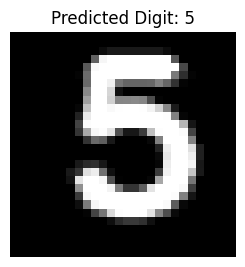

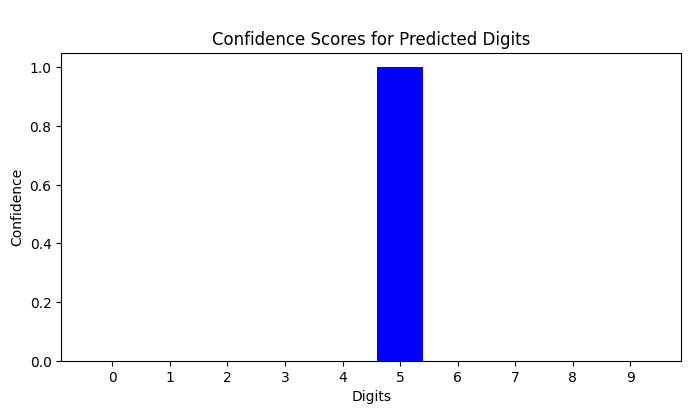

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Load the trained model
model = load_model('mnist.h5')

# Generate Random digit image
random_digit = np.random.randint(0, 10)
random_image = np.zeros((28, 28), dtype=np.uint8)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(random_image, str(random_digit), (7, 21), font, 0.8, (255, 255, 255), 2, cv2.LINE_AA)  # Put the digit on the image

# Reshape the image for prediction
random_image = random_image.reshape((1, 28, 28, 1)).astype('float32') / 255

# Make prediction
prediction = model.predict(random_image)
predicted_digit = np.argmax(prediction)
confidence = prediction[0][predicted_digit]

# Display the prediction and confidence
print("\nPredicted Digit:", predicted_digit)
print("\nConfidence (Accuracy):", confidence)

# Display the image
plt.subplot(1, 2, 1)
plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.title('Predicted Digit: ' + str(predicted_digit))
plt.axis('off')

print("\n")
# Plot confidence scores for predicted digits
digits = range(10)
plt.figure(figsize=(8, 4))
plt.bar(digits, prediction[0], color='blue')
plt.xlabel('Digits')
plt.ylabel('Confidence')
plt.title('\nConfidence Scores for Predicted Digits')
plt.xticks(digits)
plt.show()

